<a href="https://colab.research.google.com/github/RDifault/Computer-Vision/blob/main/Instance_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ramadhian Eka Putra /
2301872242 /
LA08

Mengimport seluruh libraries yang dibutuhkan

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

Untuk mendapatkan fitur SIFT exractor

In [ ]:
!pip uninstall -y opencv-contrib-python
!pip install opencv-contrib-python==4.3.0.38

#1.	Selecting representative images from an image dataset ((https://github.com/willard-yuan/image-retrieval/tree/master/bag-of-words-python-dev-version)

In [ ]:
path = 'dataset/train/'

images = []

for i in os.listdir(path):
  img_path = cv2.imread(path + i)
  images.append(img_path)

#2.	Collect all the SIFT descriptors from the images in number 1

Menginisiasikan SIFT

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

Mencari descriptor pada tiap image menggunakan SIFT kemudian menampungnya kedalam array

In [ ]:
dsc = []

for i in images :
  _, desc = sift.detectAndCompute(i,None)
  dsc.append(desc)

#3. Cluster these descriptors using K Means into k number of clusters where k is a number you set. The center of these clusters are the "visual words" i.e. representative features in your database of images.

Reshape descriptor list menjadi stack secara vertical agar bisa dilakukan K-means clustering

In [ ]:
descriptors=dsc[0][1]
for i in dsc[1:]:
    descriptors=np.vstack((descriptors, i))

K-means Clustering

In [ ]:
k=50
voc,_=kmeans(descriptors,k,1)

#4.	For every image in the database, you are going to create a vector V that counts how frequently the different features in the dictionary occurs

In [ ]:
V = np.zeros((len(os.listdir(path)), k))

for i in range (len(os.listdir(path))) :
  words,_ = vq(dsc[i], voc)
  for j in words :
    V[i][j] += 1

#5. At this stage, you might want to normalize the histogram by dividing each entry by the sum of all the entries so that images with very different number of SIFT key-points found can be made comparable.

In [ ]:
count = np.sum((V > 0) * 1, axis= 0)

n = np.array(np.log((1.0 * len(images) + 1 )/(1.0 * count + 1)), 'float64')

Vn = V * n
Vn = preprocessing.normalize(Vn)

#6. Now, to compare 2 images, you compare this new vector V instead of the SIFT descriptors themselves.

In [ ]:
target = cv2.imread('target_image.jpeg')
_, desc2 = sift.detectAndCompute(target, None)

V_search = np.zeros((1, k))
words, _ = vq(desc2, voc)
for j in words:
    V_search[0][j] += 1

Vn_search = V_search * n
Vn_search = preprocessing.normalize(Vn_search)

score = np.dot(Vn_search, Vn.T)
identical = np.argsort(-score)[0]

identical = []

for i in range(len(Vn)):
    search = cosine_similarity(Vn_search.reshape(1,-1), Vn[i].reshape(1,-1))
    identical.append(search)
    print(search)

output = identical.index(max(identical))

[[0.87175536]]
[[0.9696772]]
[[0.79865142]]
[[0.84820686]]
[[0.35841622]]
[[0.91712983]]
[[0.86081109]]
[[0.7108676]]
[[0.90400858]]
[[0.8956388]]
[[0.86152914]]
[[0.9178958]]
[[0.75834631]]
[[0.28949418]]
[[0.91585257]]
[[0.85583092]]
[[0.86274455]]
[[0.86705031]]
[[0.75209911]]
[[0.94489111]]
[[0.84309065]]
[[0.39677853]]
[[0.88641025]]
[[0.85688899]]
[[0.82934534]]
[[0.84908392]]
[[0.92520539]]
[[0.80558339]]
[[0.85770486]]
[[0.93234449]]
[[0.90329944]]
[[0.85244528]]
[[0.86545517]]
[[0.83989952]]
[[0.88222774]]
[[0.86159575]]
[[0.92744646]]
[[0.94277105]]
[[0.70394667]]
[[0.93987782]]
[[0.73149872]]
[[0.84590623]]
[[0.87992508]]
[[0.80221848]]
[[0.77628819]]
[[0.89242343]]
[[0.8678389]]
[[0.93274773]]
[[0.72352634]]
[[0.89539618]]
[[0.9492195]]
[[0.85921261]]
[[0.79021973]]
[[0.86577071]]
[[0.92479572]]
[[0.86862895]]


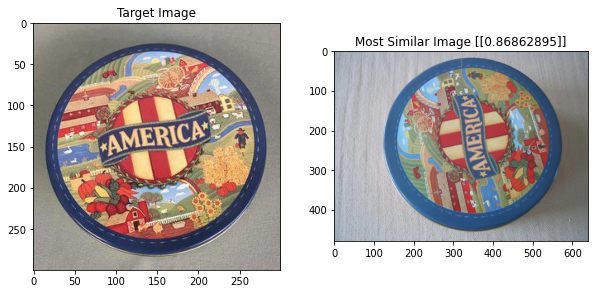

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Target Image")
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))

plt.subplot(2,2,2)
plt.title("Most Similar Image " + str(search))
plt.imshow(cv2.cvtColor(images[output], cv2.COLOR_BGR2RGB))